1. Імпортуйте необхідні модулі (matplotlib та інші).

In [75]:
import heapq
import matplotlib.pyplot as plt

2. Візьміть код реалізації MapReduce з конспекту.

In [76]:
import string

from concurrent.futures import ThreadPoolExecutor
from collections import defaultdict

import requests


def get_text(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Перевірка на помилки HTTP
        return response.text
    except requests.RequestException as e:
        return None


# Функція для видалення знаків пунктуації
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


def map_function(word):
    return word, 1


def shuffle_function(mapped_values):
    shuffled = defaultdict(list)
    for key, value in mapped_values:
        shuffled[key].append(value)
    return shuffled.items()


def reduce_function(key_values):
    key, values = key_values
    return key, sum(values)


# Виконання MapReduce
def map_reduce(text, search_words=None):
    # Видалення знаків пунктуації
    text = remove_punctuation(text)
    words = text.split()

    # Якщо задано список слів для пошуку, враховувати тільки ці слова
    if search_words:
        words = [word for word in words if word in search_words]

    # Паралельний Мапінг
    with ThreadPoolExecutor() as executor:
        mapped_values = list(executor.map(map_function, words))

    # Крок 2: Shuffle
    shuffled_values = shuffle_function(mapped_values)

    # Паралельна Редукція
    with ThreadPoolExecutor() as executor:
        reduced_values = list(executor.map(reduce_function, shuffled_values))

    return dict(reduced_values)

3. Створіть функцію visualize_top_words для візуалізації результатів.

In [77]:
def visualize_top_words(url, n):
    text = get_text(url)
    if text:
        # Виконання MapReduce на вхідному тексті
        result = map_reduce(text)
        print("Результат підрахунку слів:", result)
        heap = [(value, key) for key, value in result.items()]
        lagest = heapq.nlargest(n, heap, key=None)
        lagest.reverse()

        y = [i[1] for i in lagest]
        x = [i[0] for i in lagest]
        plt.barh(y, x)

        # setting label of y-axis
        plt.ylabel("Words")

        # setting label of x-axis
        plt.xlabel("Frequency")
        plt.title(f"Top {n} Most Frequent Words")
        plt.show()

    else:
        print("Помилка: Не вдалося отримати вхідний текст.")

4. У головному блоці коду отримайте текст за URL, застосуйте MapReduce та візуалізуйте результати.

Результат підрахунку слів: {'Project': 6, 'Gutenberg': 6, 'Australia': 7, 'Title': 2, 'Nineteen': 3, 'eightyfour': 2, 'Author': 2, 'George': 2, 'Orwell': 2, 'pseudonym': 2, 'of': 3467, 'Eric': 2, 'Blair': 2, '19031950': 2, 'A': 131, 'eBook': 3, 'No': 49, '0100021txt': 1, 'Language': 1, 'English': 12, 'Date': 2, 'first': 84, 'posted': 2, 'August': 2, '2001': 1, 'most': 48, 'recently': 4, 'updated': 1, 'November': 1, '2008': 1, 'eBooks': 2, 'are': 287, 'created': 4, 'from': 393, 'printed': 4, 'editions': 1, 'which': 465, 'in': 1672, 'the': 5781, 'public': 20, 'domain': 1, 'unless': 6, 'a': 2421, 'copyright': 2, 'notice': 7, 'is': 596, 'included': 5, 'We': 74, 'do': 131, 'NOT': 2, 'keep': 40, 'any': 219, 'compliance': 1, 'with': 746, 'particular': 13, 'paper': 44, 'edition': 5, 'Copyright': 1, 'laws': 8, 'changing': 6, 'all': 348, 'over': 159, 'world': 96, 'Be': 1, 'sure': 29, 'to': 2285, 'check': 4, 'for': 570, 'your': 159, 'country': 12, 'before': 119, 'downloading': 1, 'or': 450, 'redi

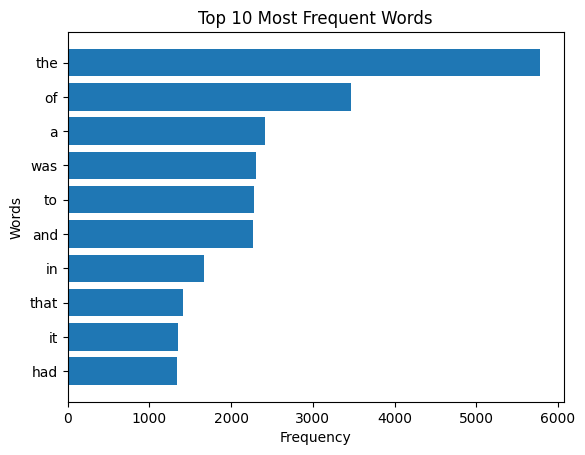

In [78]:
# Вхідний текст для обробки
url = "https://gutenberg.net.au/ebooks01/0100021.txt"
visualize_top_words(url, 10)